In [ ]:
#Course  : DSC530
#Name : Tejashri Bhilare
#Week 5

#Chapter 5

#Exercises :  Page 62: 5-1  , Page 63: 5-2  , Pages 75-76: 6-1

In [4]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [5]:
import numpy as np

import thinkstats2
import thinkplot


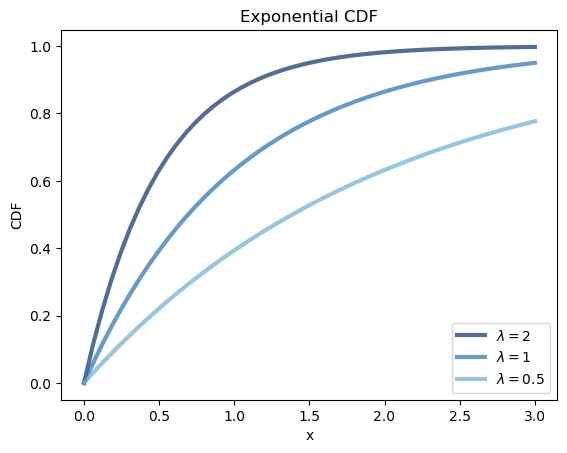

In [2]:
#Exponential distribution

#Here's what the exponential CDF looks like with a range of parameters.

thinkplot.PrePlot(3)
for lam in [2.0, 1, 0.5]:
    xs, ps = thinkstats2.RenderExpoCdf(lam, 0, 3.0, 50)
    label = r"$\lambda=%g$" % lam
    thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title="Exponential CDF", xlabel="x", ylabel="CDF", loc="lower right")

In [6]:

#Here's the distribution of interarrival times from a dataset of birth times.


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/analytic.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/babyboom.dat")

Downloaded analytic.py
Downloaded babyboom.dat


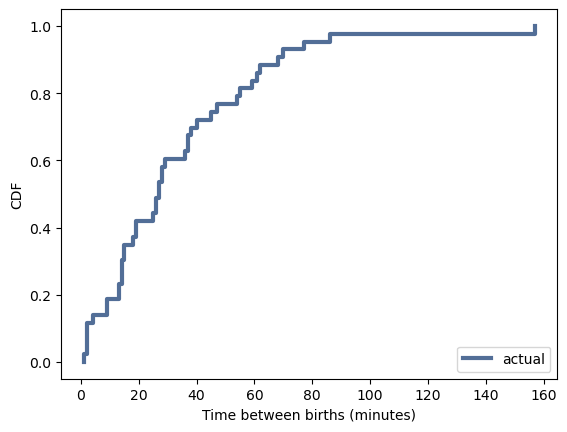

In [7]:
import analytic

df = analytic.ReadBabyBoom()
diffs = df.minutes.diff()
cdf = thinkstats2.Cdf(diffs, label="actual")

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel="Time between births (minutes)", ylabel="CDF")

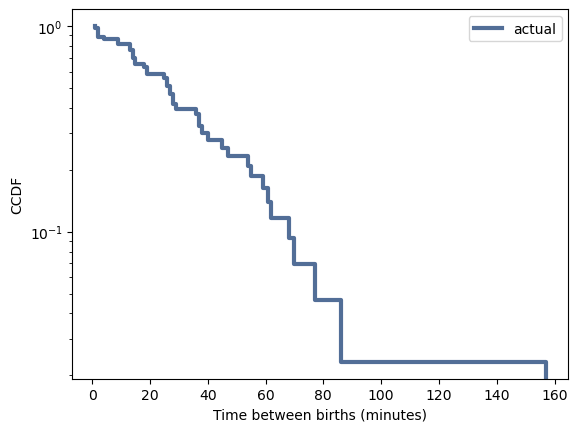

In [8]:
#How CCDF looks like on a log-y scale.
#A straight line is consistent with an exponential distribution over here 

thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(
    xlabel="Time between births (minutes)",
    ylabel="CCDF",
    yscale="log",
    loc="upper right",
)

In [10]:
#Normal distribution

#Here's what the normal CDF looks like with a range of parameters.

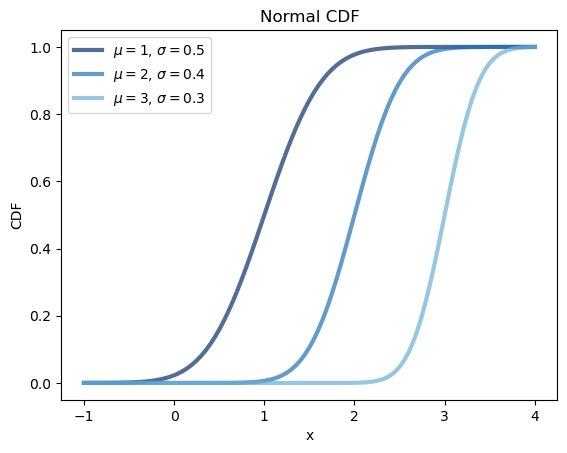

In [11]:
thinkplot.PrePlot(3)

mus = [1.0, 2.0, 3.0]
sigmas = [0.5, 0.4, 0.3]
for mu, sigma in zip(mus, sigmas):
    xs, ps = thinkstats2.RenderNormalCdf(mu=mu, sigma=sigma, low=-1.0, high=4.0)
    label = r"$\mu=%g$, $\sigma=%g$" % (mu, sigma)
    thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title="Normal CDF", xlabel="x", ylabel="CDF", loc="upper left")

In [12]:
# Normal model -  to fit the distribution of birth weights from the NSFG.

#downlaoding datasets and libraries

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [13]:
import nsfg
import first

In [14]:
preg = nsfg.ReadFemPreg()
weights = preg.totalwgt_lb.dropna()

Mean, Var 7.280883100022579 1.5452125703544901
Sigma 1.2430657948614345


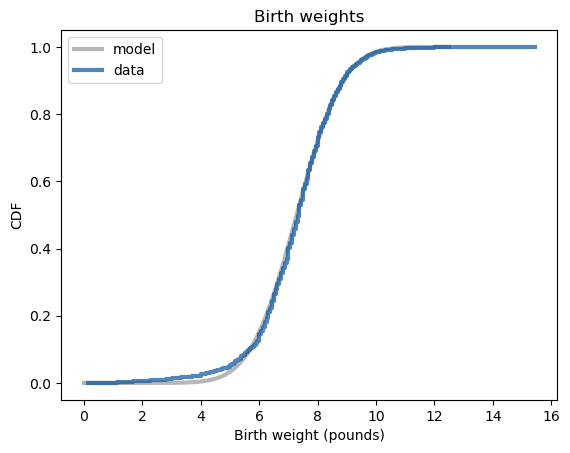

In [15]:
# observed CDF and the model. The model fits the data well except in the left tail.


# estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
print("Mean, Var", mu, var)

# plot the model
sigma = np.sqrt(var)
print("Sigma", sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label="model", color="0.6")

# plot the data
cdf = thinkstats2.Cdf(weights, label="data")

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
thinkplot.Config(title="Birth weights", xlabel="Birth weight (pounds)", ylabel="CDF")

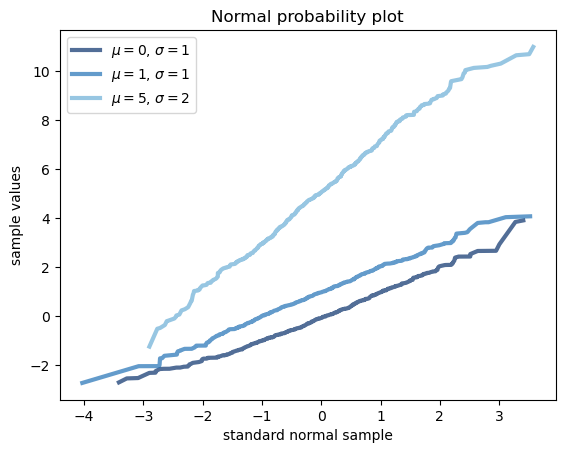

In [16]:
#A normal probability plot is a visual test for normality. 
#The following example shows that if the data are actually from a normal distribution, the plot is approximately straight.

n = 1000
thinkplot.PrePlot(3)

mus = [0, 1, 5]
sigmas = [1, 1, 2]

for mu, sigma in zip(mus, sigmas):
    sample = np.random.normal(mu, sigma, n)
    xs, ys = thinkstats2.NormalProbability(sample)
    label = "$\mu=%d$, $\sigma=%d$" % (mu, sigma)
    thinkplot.Plot(xs, ys, label=label)

thinkplot.Config(
    title="Normal probability plot",
    xlabel="standard normal sample",
    ylabel="sample values",
)

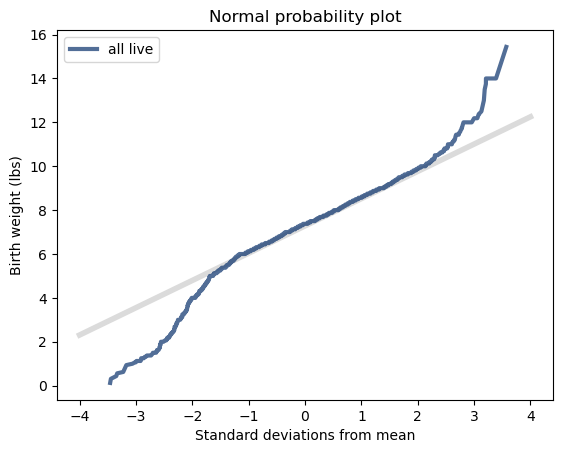

In [17]:
#Here's the normal probability plot for

mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color="0.8")

xs, ys = thinkstats2.NormalProbability(weights)
thinkplot.Plot(xs, ys, label="all live")

thinkplot.Config(
    title="Normal probability plot",
    xlabel="Standard deviations from mean",
    ylabel="Birth weight (lbs)",
)

In [18]:
#And here if we suspect that the deviation in the left tail is due to preterm babies, we can check by selecting only full term births


full_term = preg[preg.prglngth >= 37]
term_weights = full_term.totalwgt_lb.dropna()

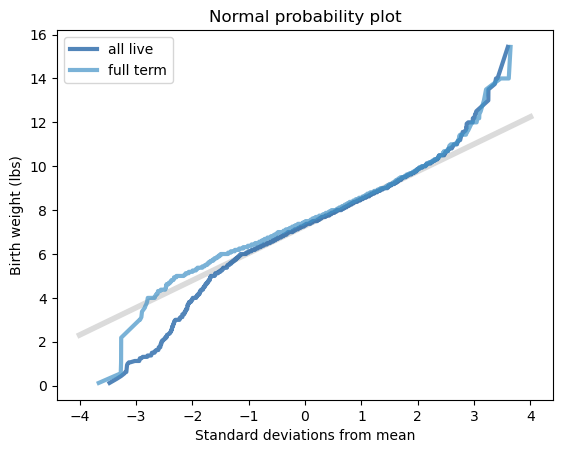

In [19]:
#Now the deviation in the left tail is almost gone, but the heaviest babies are still heavy.


mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color="0.8")

thinkplot.PrePlot(2)
xs, ys = thinkstats2.NormalProbability(weights)
thinkplot.Plot(xs, ys, label="all live")

xs, ys = thinkstats2.NormalProbability(term_weights)
thinkplot.Plot(xs, ys, label="full term")
thinkplot.Config(
    title="Normal probability plot",
    xlabel="Standard deviations from mean",
    ylabel="Birth weight (lbs)",
)

In [20]:
#Lognormal model


#For an example of a lognormal disrtribution, we'll look at adult weights from the BRFSS.


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/brfss.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/CDBRFS08.ASC.gz")

Downloaded brfss.py
Downloaded CDBRFS08.ASC.gz


In [21]:
import brfss

df = brfss.ReadBrfss()
weights = df.wtkg2.dropna()

In [22]:
#The following function estimates the parameters of a normal distribution and plots the data and a normal model.

def MakeNormalModel(weights):
    """Plots a CDF with a Normal model.

    weights: sequence
    """
    cdf = thinkstats2.Cdf(weights, label="weights")

    mean, var = thinkstats2.TrimmedMeanVar(weights)
    std = np.sqrt(var)
    print("n, mean, std", len(weights), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label="model", linewidth=4, color="0.8")
    thinkplot.Cdf(cdf)
    
    
    

n, mean, std 398484 78.59599565702814 17.75455519179819


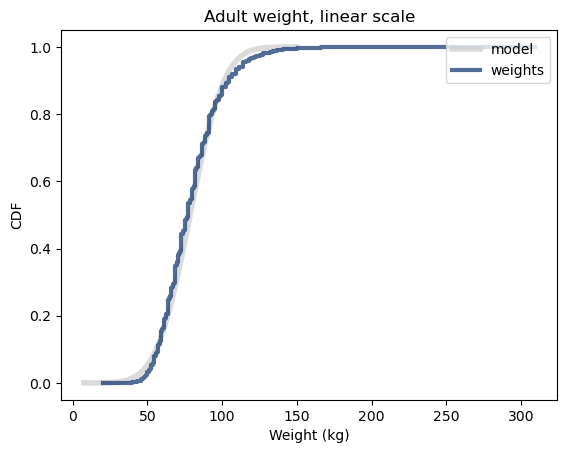

In [24]:
#distribution of adult weights and a normal model, which is not a very good fit.

MakeNormalModel(weights)
thinkplot.Config(
    title="Adult weight, linear scale",
    xlabel="Weight (kg)",
    ylabel="CDF",
    loc="upper right",
)

n, mean, std 398484 1.884660713731975 0.096235802591517


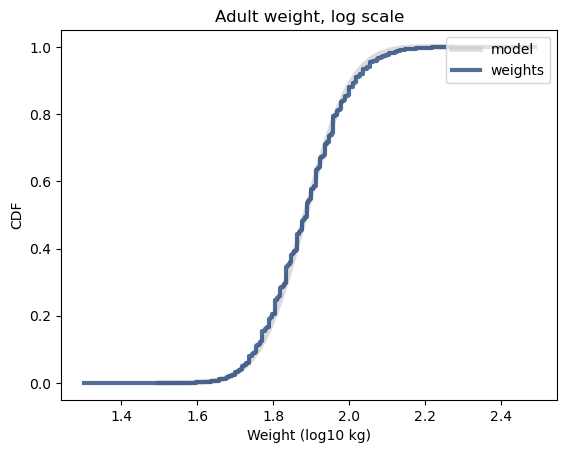

In [25]:
#Here's the distribution of adult weight and a lognormal model, plotted on a log-x scale. The model is a better fit for the data, although the heaviest people are heavier than the model expects.

log_weights = np.log10(weights)
MakeNormalModel(log_weights)
thinkplot.Config(
    title="Adult weight, log scale",
    xlabel="Weight (log10 kg)",
    ylabel="CDF",
    loc="upper right",
)

In [26]:
#The following function generates a normal probability plot.

def MakeNormalPlot(weights):
    """Generates a normal probability plot of birth weights.

    weights: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color="0.8", label="model")

    xs, ys = thinkstats2.NormalProbability(weights)
    thinkplot.Plot(xs, ys, label="weights")



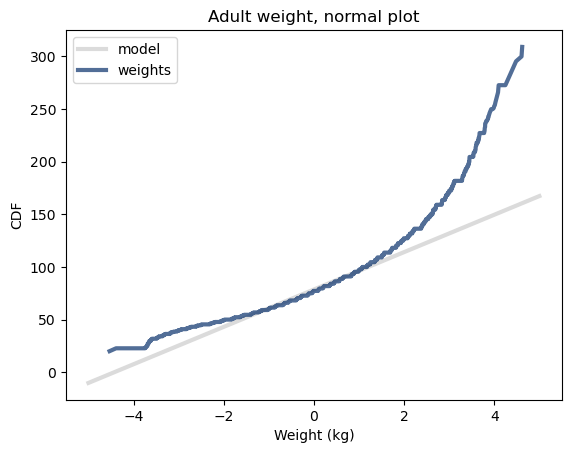

In [27]:
#When we generate a normal probability plot with adult weights, we can see clearly that the data deviate from the model systematically.

MakeNormalPlot(weights)
thinkplot.Config(
    title="Adult weight, normal plot",
    xlabel="Weight (kg)",
    ylabel="CDF",
    loc="upper left",
)

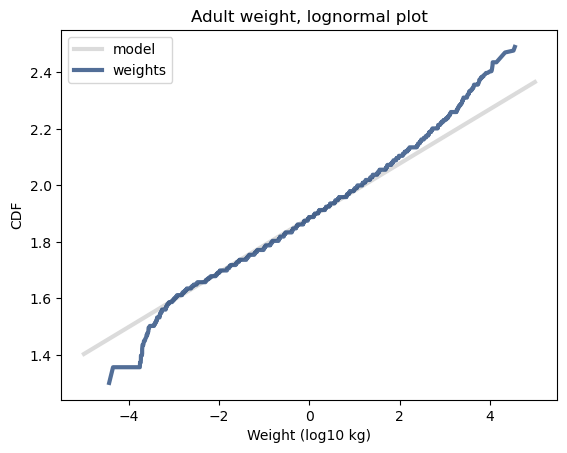

In [28]:
#If we make a normal probability plot with log weights, the model fit the data well except in the tails, where the heaviest people exceed expectations.

MakeNormalPlot(log_weights)
thinkplot.Config(
    title="Adult weight, lognormal plot",
    xlabel="Weight (log10 kg)",
    ylabel="CDF",
    loc="upper left",
)

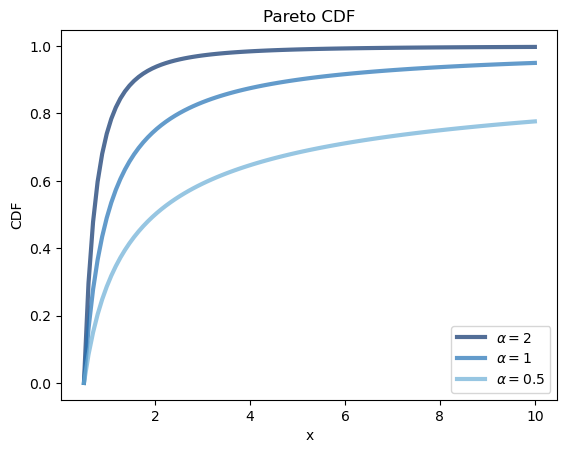

In [29]:
#Pareto distribution


#Here's what the Pareto CDF looks like with a range of parameters.


xmin = 0.5

thinkplot.PrePlot(3)
for alpha in [2.0, 1.0, 0.5]:
    xs, ps = thinkstats2.RenderParetoCdf(xmin, alpha, 0, 10.0, n=100)
    thinkplot.Plot(xs, ps, label=r"$\alpha=%g$" % alpha)

thinkplot.Config(title="Pareto CDF", xlabel="x", ylabel="CDF", loc="lower right")

In [30]:
#The distribution of populations for cities and towns is sometimes said to be Pareto-like.

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/populations.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/PEP_2012_PEPANNRES_with_ann.csv")

Downloaded populations.py
Downloaded PEP_2012_PEPANNRES_with_ann.csv


In [31]:
import populations

pops = populations.ReadData()
print("Number of cities/towns", len(pops))

Number of cities/towns 19515


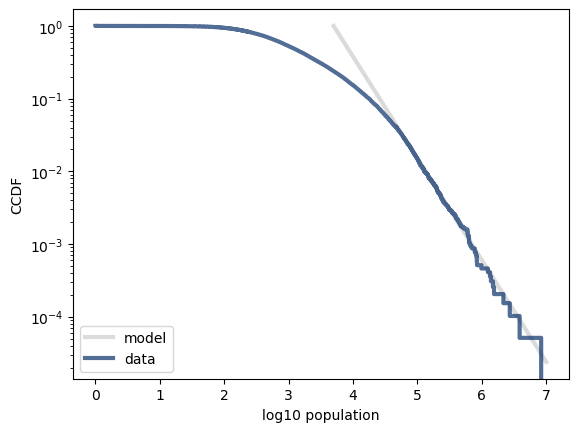

In [32]:
#Here's the distribution of population for cities and towns in the U.S., along with a Pareto model. The model fits the data well in the tail.


log_pops = np.log10(pops)
cdf = thinkstats2.Cdf(pops, label="data")
cdf_log = thinkstats2.Cdf(log_pops, label="data")

# pareto plot
xs, ys = thinkstats2.RenderParetoCdf(xmin=5000, alpha=1.4, low=0, high=1e7)
thinkplot.Plot(np.log10(xs), 1 - ys, label="model", color="0.8")

thinkplot.Cdf(cdf_log, complement=True)
thinkplot.Config(
    xlabel="log10 population", ylabel="CCDF", yscale="log", loc="lower left"
)

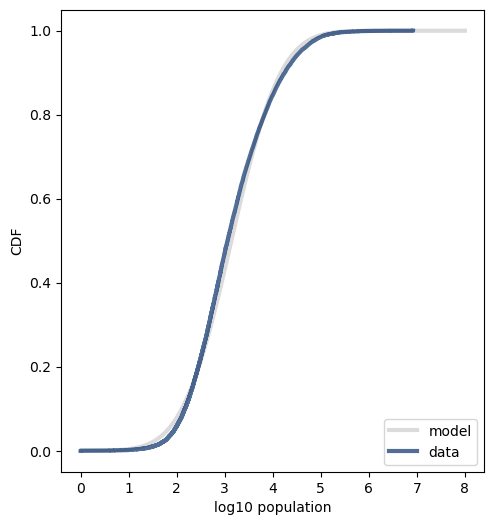

In [33]:
#The lognormal model might be abetter fit for this data (as is often the case for things that are supposed to be Pareto).

thinkplot.PrePlot(cols=2)

mu, sigma = log_pops.mean(), log_pops.std()
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=8)
thinkplot.Plot(xs, ps, label="model", color="0.8")

thinkplot.Cdf(cdf_log)
thinkplot.Config(xlabel="log10 population", ylabel="CDF", loc="lower right")

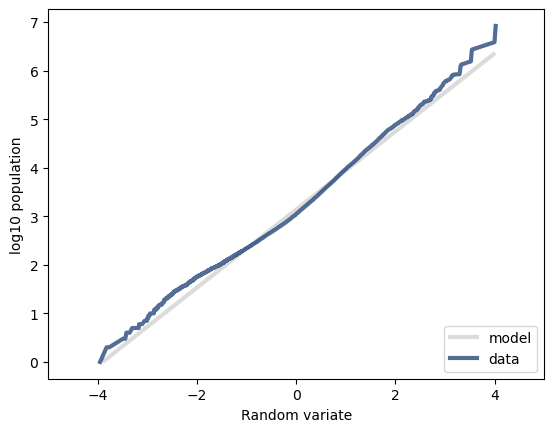

In [34]:
#Here's a normal probability plot for the log-populations. The model fits the data well except in the right tail, where the biggest cities are bigger than expected.

thinkstats2.NormalProbabilityPlot(log_pops, label="data")
thinkplot.Config(xlabel="Random variate", ylabel="log10 population", xlim=[-5, 5])

In [35]:
#Exercise: In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women.

#In order to join Blue Man Group, you have to be male between 5’10” and 6’1” What percentage of the U.S. male population is in this range? Hint: use scipy.stats.norm.cdf.


#Here   scipy.stats contains objects that represent analytic distributions


import scipy.stats

In [36]:
#Consider scipy.stats.norm represents a normal distribution.

mu = 178
sigma = 7.7
dist = scipy.stats.norm(loc=mu, scale=sigma)
type(dist)




scipy.stats._distn_infrastructure.rv_continuous_frozen

In [37]:
# Here "frozen random variable" can compute its mean and standard deviation.


dist.mean(), dist.std()

(178.0, 7.7)

In [38]:
#It can also evaluate its CDF. How many people are more than one standard deviation below the mean? About 16%

dist.cdf(mu-sigma)

0.1586552539314574

In [39]:
#How many people are between 5'10" and 6'1"?

# Solution

low = dist.cdf(177.8)    # 5'10"
high = dist.cdf(185.4)   # 6'1"
low, high, high-low

(0.48963902786483265, 0.8317337108107857, 0.3420946829459531)

In [ ]:
#Exercise: To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. With the parameters xm = 1 m and α = 1.7, we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m.

#Plot this distribution. What is the mean human height in Pareto world? What fraction of the population is shorter than the mean? If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? How tall do we expect the tallest person to be?


In [40]:
# Here scipy.stats.pareto represents a pareto distribution.
#In Pareto world, the distribution of human heights has parameters alpha=1.7 and xmin=1 meter. 
#So the shortest person is 100 cm and the median is 150.


alpha = 1.7
xmin = 1       # meter
dist = scipy.stats.pareto(b=alpha, scale=xmin)
dist.median()

1.5034066538560549

In [41]:
#What is the mean height in Pareto world?

dist.mean()

2.428571428571429

In [42]:
#What fraction of people are shorter than the mean?

dist.cdf(dist.mean())

0.778739697565288

In [43]:
#Out of 7 billion people, how many do we expect to be taller than 1 km? You could use dist.cdf or dist.sf.


(1 - dist.cdf(1000)) * 7e9, dist.sf(1000) * 7e9

(55602.976430479954, 55602.97643069972)

In [44]:
#How tall do we expect the tallest person to be?


# One way to solve this is to search for a height that we
# expect one person out of 7 billion to exceed.

# It comes in at roughly 600 kilometers.

dist.sf(600000) * 7e9   

1.0525455861201714

In [45]:
# Another way is to use `ppf`, which evaluates the "percent point function", which
# is the inverse CDF.  So we can compute the height in meters that corresponds to
# the probability (1 - 1/7e9).

dist.ppf(1 - 1/7e9)

618349.6106759505

In [47]:
# Here now we will resolve chapter 6 examples

#import required libraries

from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot

In [48]:
# We will start with the data from the BRFSS again.


df = brfss.ReadBrfss(nrows=None)

In [49]:
#Here are the mean and standard deviation of female height in cm.

female = df[df.sex==2]
female_heights = female.htm3.dropna()
mean, std = female_heights.mean(), female_heights.std()
mean, std

(163.22347500412215, 7.269156286641344)

In [50]:
#NormalPdf returns a Pdf object that represents the normal distribution with the given parameters.

#Density returns a probability density, which doesn't mean much by itself.

pdf = thinkstats2.NormalPdf(mean, std)
pdf.Density(mean + std)

0.03328731904744125

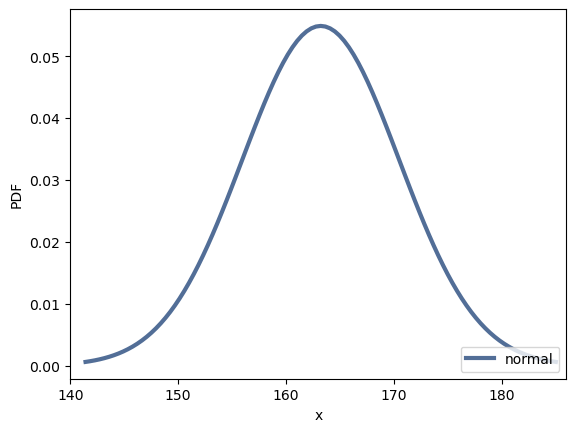

In [51]:
#thinkplot provides Pdf, which plots the probability density with a smooth curve.


thinkplot.Pdf(pdf, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF', xlim=[140, 186])

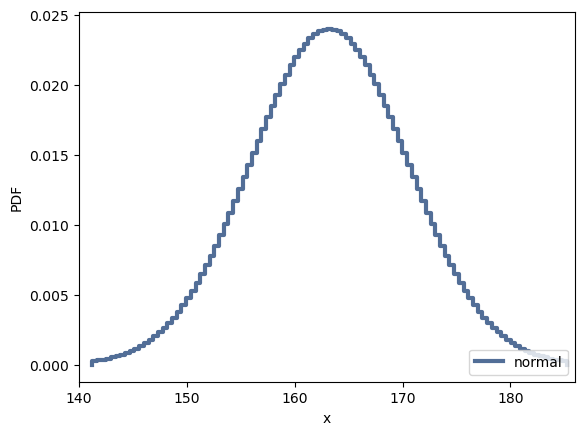

In [52]:
#Pdf provides MakePmf, which returns a Pmf object that approximates the Pdf.


pmf = pdf.MakePmf()
thinkplot.Pmf(pmf, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF', xlim=[140, 186])

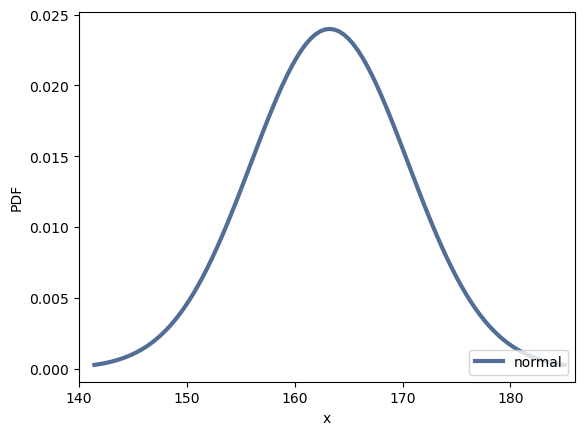

In [53]:
# If we have a Pmf, you can also plot it using Pdf, if we have reason to think it should be represented as a smooth curve.

thinkplot.Pdf(pmf, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF', xlim=[140, 186])


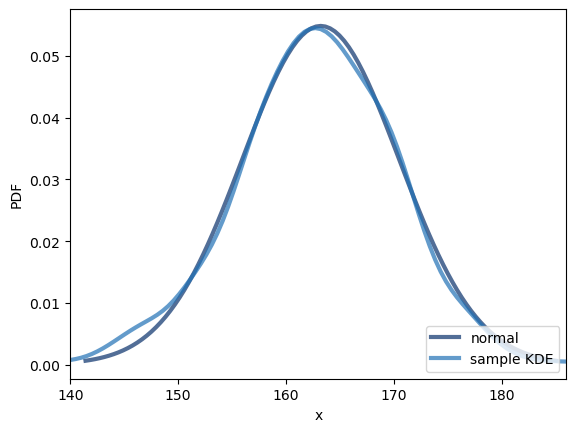

In [55]:
#Using a sample from the actual distribution, we can estimate the PDF using Kernel Density Estimation (KDE).

thinkplot.Pdf(pdf, label='normal')

sample = np.random.normal(mean, std, 500)
sample_pdf = thinkstats2.EstimatedPdf(sample, label='sample')
thinkplot.Pdf(sample_pdf, label='sample KDE')
thinkplot.Config(xlabel='x', ylabel='PDF', xlim=[140, 186])

In [56]:
#Moments


#Raw moments are just sums of powers.

def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

In [57]:
#The first raw moment is the mean. The other raw moments don't mean much.

RawMoment(female_heights, 1), RawMoment(female_heights, 2), RawMoment(female_heights, 3)


(163.22347500412215, 26694.74321809659, 4374411.46250422)

In [58]:
def Mean(xs):
    return RawMoment(xs, 1)

Mean(female_heights)

163.22347500412215

In [59]:
#The central moments are powers of distances from the mean.

def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)

In [60]:
#The first central moment is approximately 0. The second central moment is the variance.

CentralMoment(female_heights, 1), CentralMoment(female_heights, 2), CentralMoment(female_heights, 3)


(-9.903557940122168e-14, 52.84042567529328, -46.88569506887073)

In [61]:
def Var(xs):
    return CentralMoment(xs, 2)

Var(female_heights)

52.84042567529328

In [62]:
#The standardized moments are ratios of central moments, with powers chosen to make the dimensions cancel.

def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k



In [63]:
#The third standardized moment is skewness.

StandardizedMoment(female_heights, 1), StandardizedMoment(female_heights, 2), StandardizedMoment(female_heights, 3)

(-1.3624108479155668e-14, 1.0, -0.1220649274510512)

In [64]:
def Skewness(xs):
    return StandardizedMoment(xs, 3)

Skewness(female_heights)

-0.1220649274510512

In [65]:
#Normally a negative skewness indicates that the distribution has a longer tail on the left. In that case, the mean is usually less than the median.

def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

In [66]:
# Here in this case the mean is greater than the median, which indicates skew to the right.

Mean(female_heights), Median(female_heights)

(163.22347500412215, 163.0)

In [67]:
#As the skewness is based on the third moment, it is not robust; that is, it depends strongly on a few outliers. Pearson's median skewness is more robust.

def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

In [68]:
#Pearson's skewness is positive, indicating that the distribution of female heights is slightly skewed to the right.

PearsonMedianSkewness(female_heights)

0.0922289055190516

In [69]:
#Birth weights
#Let's look at the distribution of birth weights again.

import first

live, firsts, others = first.MakeFrames()


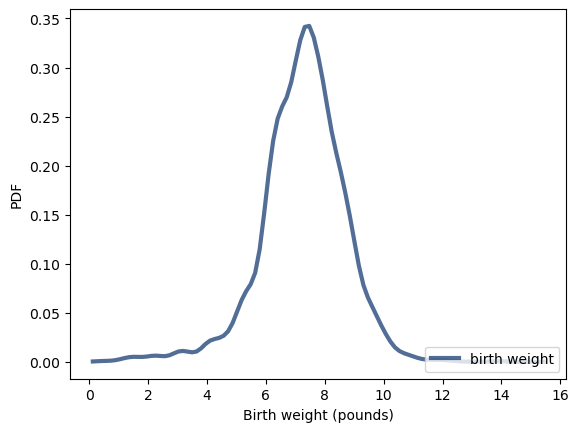

In [70]:
#Based on KDE, it looks like the distribution is skewed to the left.

birth_weights = live.totalwgt_lb.dropna()
pdf = thinkstats2.EstimatedPdf(birth_weights)
thinkplot.Pdf(pdf, label='birth weight')
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='PDF')

In [71]:
#The mean is less than the median, which is consistent with left skew.

Mean(birth_weights), Median(birth_weights)


(7.265628457623368, 7.375)

In [72]:
#And both ways of computing skew are negative, which is consistent with left skew.

Skewness(birth_weights), PearsonMedianSkewness(birth_weights)

(-0.5895062687577989, -0.23300028954731833)

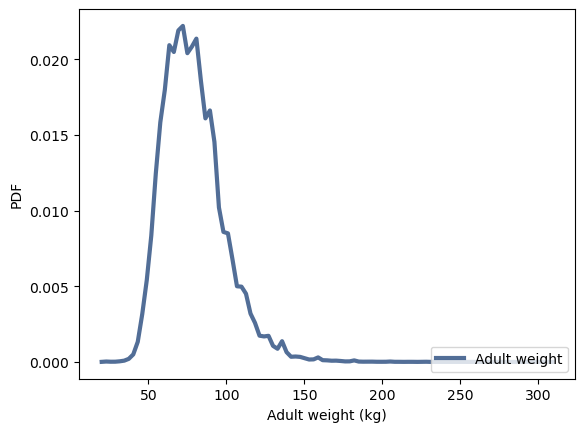

In [73]:
#Adult weights
#Now let's look at adult weights from the BRFSS. The distribution looks skewed to the right.

adult_weights = df.wtkg2.dropna()
pdf = thinkstats2.EstimatedPdf(adult_weights)
thinkplot.Pdf(pdf, label='Adult weight')
thinkplot.Config(xlabel='Adult weight (kg)', ylabel='PDF')


In [74]:
#The mean is greater than the median, which is consistent with skew to the right.

Mean(adult_weights), Median(adult_weights)

(78.99245299687198, 77.27)

In [75]:
#And both ways of computing skewness are positive.

Skewness(adult_weights), PearsonMedianSkewness(adult_weights)

(1.054840012109306, 0.2643673381618039)

In [78]:
#Exercises

#Here InterpolateSample generates a pseudo-sample; that is, a sample of household incomes that yields the same number of respondents in each range as the actual data.
#It assumes that incomes in each range are equally spaced on a log10 scale.

def InterpolateSample(df, log_upper=6.0):
    """Makes a sample of log10 household income.

    Assumes that log10 income is uniform in each range.

    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range

    returns: NumPy array of log10 household income
    """
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.loc[0, 'log_lower'] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.loc[41, 'log_upper'] = log_upper
    
    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample

In [79]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc06.csv")

Downloaded hinc.py
Downloaded hinc06.csv


In [80]:
import hinc
income_df = hinc.ReadData()

In [81]:
log_sample = InterpolateSample(income_df, log_upper=6.0)

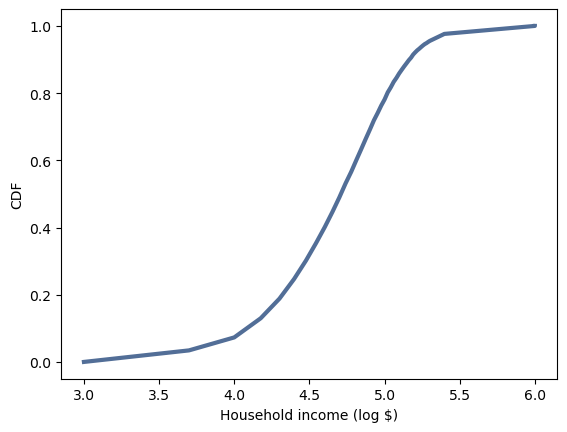

In [82]:
log_cdf = thinkstats2.Cdf(log_sample)
thinkplot.Cdf(log_cdf)
thinkplot.Config(xlabel='Household income (log $)',
               ylabel='CDF')

In [83]:
sample = np.power(10, log_sample)

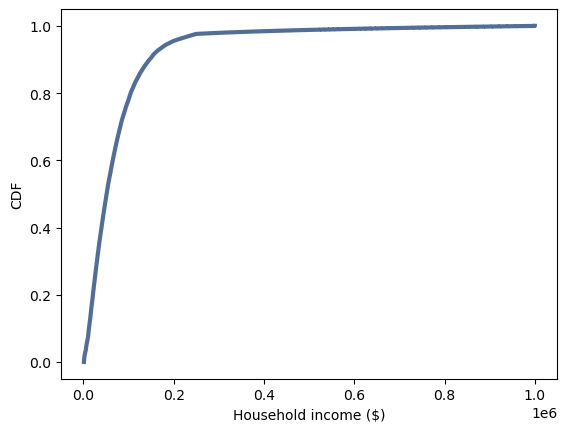

In [84]:
cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Household income ($)',
               ylabel='CDF')

In [85]:
#Compute the median, mean, skewness and Pearson’s skewness of the resulting sample. What fraction of households report a taxable income below the mean? How do the results depend on the assumed upper bound?

# Solution

Mean(sample), Median(sample)

(74278.70753118733, 51226.45447894046)

In [86]:
# Solution

Skewness(adult_weights), PearsonMedianSkewness(adult_weights)

(1.054840012109306, 0.2643673381618039)

In [87]:
# Solution

# About 66% of the population makes less than the mean

cdf.Prob(Mean(sample))

0.660005879566872

In [ ]:
#All of this is based on an assumption that the highest income is one million dollars, but that's certainly not correct. What happens to the skew if the upper bound is 10 million?

#Here Without better information about the top of this distribution, we can't say much about the skewness of the distribution.